In [1]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from collections import Counter

## Iris dataset불러오기

In [2]:
data = []
with open('iris.data', 'r') as f:
    for line in f:
        if line.strip():
            item = line.strip().split(",")
            data.append(([float(val) for val in item[:-1]], item[-1]))

species = {s: i for i, s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]

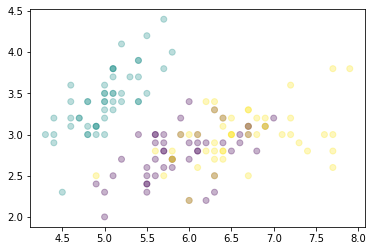

In [3]:
plt.scatter([d[0][0] for d in data],
            [d[0][1] for d in data],
            c = [d[1] for d in data], alpha = 0.3)
plt.show()

## 데이터 분리하기

In [4]:
# train data 와 test data로 분리
random.shuffle(data)
train = data[:30]
test = data[-30:]

In [5]:
# distance 함수 생성
def distance(a,b):
    s = 0
    for i in range(len(a[0])):
        s += (a[0][i] - b[0][i]) ** 2
        
    return s ** 0.5

In [6]:
# knn_classify
def knn_classify(k, query, train):
    knns = sorted((distance(point, query), point) for point in train)[:k]
    
    #거리에 따라 가중치를 주어 점수를 주어 계산
    scores = {}
    for dist, point in knns:
        scores[point[1]] = scores.get(point[1], 0) + 1 /(1 + dist)
        
    resp, score = max(scores.items(), key = lambda x: x[1])
    return resp

In [7]:
# test 실행
k = 3
correct = sum(1 for t in test if knn_classify(k, t, train) == t[1])
accuracy = correct / len(test)
print("accuracy: ", accuracy)

accuracy:  0.9666666666666667


## 최적의 k 찾기

100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


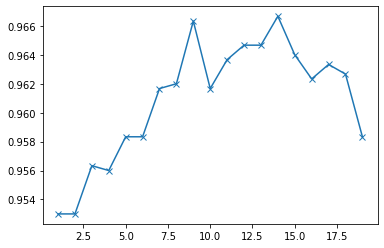

In [8]:
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

X,Y = [],[]
corrects = [0] * 20

for i in tqdm(range(num_trials)):
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]
    
    for k in range(1,20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])
        
for k in range(1,20):
    corrects[k] /= test_size * num_trials
        
plt.plot(range(1, 20), corrects[1:], '-x')
plt.show()

# 수업시간

In [9]:
data = []
with open('iris.data', 'r') as f:
    for line in f:
        if line.strip() != '':
            items = line.strip().split(",")
            vector = [float(v) for v in items[:4]]
            answer = items[4]
            data.append((vector, answer))

In [10]:
species = {'Iris-versicolor': 0, 'Iris-virginica' : 1, 'Iris-setosa':2}
data = [(d[0], species[d[1]]) for d in data]

In [11]:
random.shuffle(data)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train = data[:train_size]
test= data[:train_size:]

In [12]:
# p1, p2 같은 차원의 vector 2개
def distance(p1, p2):
    sum = 0
    for i in range(len(p1)):
        sum += (p1[i] - p2[i]) ** 2
    return sum ** 0.5

In [13]:
def knn_classify(k, query, train):
    knns = sorted( ((point, distance(query, point[0])) for point in train), key = lambda x:x[1])[:k]
    
    x = Counter(d[0][1] for d in knns).most_common(1)
    return x[0][0]

In [14]:
answer = knn_classify(3, test[0][0], train)
print('query: ', test[0])
print('answer: ', answer)

query:  ([4.7, 3.2, 1.6, 0.2], 2)
answer:  2


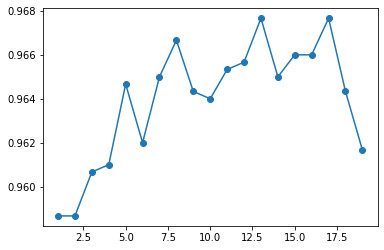

In [15]:
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
corrects = [0] * 20

for i in range(num_trials):
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]
    
    for k in range(1,20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t[0], train) == t[1])
        
for k in range(1,20):
    corrects[k] /= test_size * num_trials

plt.plot(range(1, 20), corrects[1:], 'o-')
plt.show()